# Sentiment Analysis

## Installazioni e importazioni

NLTK è una piattaforma leader per la creazione di programmi Python che funzionino con dati in linguaggio umano. Fornisce interfacce facili da usare per oltre 50 corpora e risorse lessicali come WordNet, insieme a una suite di librerie di elaborazione testi per classificazione, tokenizzazione, stemming, tagging, analisi e ragionamento semantico, wrapper per librerie NLP di livello industriale, e un forum di discussione attivo.

In [64]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
import pandas as pd

## Dataset

Si utilizza il dataset generato al termine dell'analisi dei grafi, composto esclusivamente dai commenti che hanno contribuito attivamente ai dibattiti di ciascun post. Lo si vuole analizzare per capire se tali commenti abbiano un sentiment positivo o negativo.

In [66]:
reddit_db = r"../debate_dataset.csv"
df = pd.read_csv(reddit_db, encoding = "utf-8")

In [67]:
df

,comment_id,post_id,debate_group,comment_user_name,commented_user_name,comment_body,comment_score
0,kxtjk7w,1bulhj9,1,T_JaM_T,theenkos,"No, la quantità di acqua che cade sotto forma ...",18
1,kxub8sy,1bulhj9,1,T_JaM_T,CosmoTwoFins,L'avevo sentito due o tre mesi fa in una trasm...,1
2,kxww2q1,1bulhj9,1,_The_Prov_,lore_mila_,L'unica a inquinare meno pro capite rispetto a...,2
3,kxuegzt,1bulhj9,1,_The_Prov_,Reforged_Narsil,"Si, chiedo scusa, il mio dato si riferiva solo...",2
4,kxtgmx2,1bulhj9,2,davidevernizzi,Dangerous-Practice-6,"Senza sarcasmo o polemica, cosa? Per come la v...",4
...,...,...,...,...,...,...,...
1766,ki44b0w,197vo6o,21,andrxxx,Sparaucchio,i forum e i video di youtube che ti spiegavan...,6
1767,ki69rgq,197vo6o,21,Edheldui,Sparaucchio,Ma infatti l'unica qualità che è salita è quel...,2
1768,ki40qfw,197vo6o,21,ShitOnFascists,Sparaucchio,Quei forum avevano anche una quantità infinite...,2
1769,ki7a5x8,197vo6o,21,testiclekid,Sparaucchio,Io sto usando Revanced Reddit e Revanced YouTu...,1


In [68]:
# Creo una lista di id_post unici
id_posts = df['post_id'].unique()

print(id_posts)
print("Numero di post unici: ", len(id_posts))

['1bulhj9' 'post_id' '10v8sey' '17z2hci' '1d5h5h6' '1b6cg4q' '19aeo2k'
 '1cwqkqe' '17lese9' '197vo6o']
Numero di post unici:  10


In [69]:
# Filtro il dataset in modo tale da avere solo i commenti relativi ad un post
df_filtered = df[df['post_id'] == id_posts[0]]  

In [70]:
df_filtered

,comment_id,post_id,debate_group,comment_user_name,commented_user_name,comment_body,comment_score
0,kxtjk7w,1bulhj9,1,T_JaM_T,theenkos,"No, la quantità di acqua che cade sotto forma ...",18
1,kxub8sy,1bulhj9,1,T_JaM_T,CosmoTwoFins,L'avevo sentito due o tre mesi fa in una trasm...,1
2,kxww2q1,1bulhj9,1,_The_Prov_,lore_mila_,L'unica a inquinare meno pro capite rispetto a...,2
3,kxuegzt,1bulhj9,1,_The_Prov_,Reforged_Narsil,"Si, chiedo scusa, il mio dato si riferiva solo...",2
4,kxtgmx2,1bulhj9,2,davidevernizzi,Dangerous-Practice-6,"Senza sarcasmo o polemica, cosa? Per come la v...",4
...,...,...,...,...,...,...,...
272,ky2v8u6,1bulhj9,1,de_kommaneuker,ImpressiveCourage466,Non è quello che intendevo dire. Io critico la...,1
273,kxugpzb,1bulhj9,1,de_kommaneuker,BetterUseFakeAccount,"I nostri nonni però morivano di fame, non è un...",1
274,kxtmftz,1bulhj9,1,SavingsManager3850,Dylan_Cane,Vai a vedere i report sulla Land Degradation N...,2
275,kxudqdr,1bulhj9,1,Rough-Confidence-232,sourfuture,Ho letto poco fa un tuo post dove facevi doman...,1


In [84]:
import numpy as np

# Creo una lista di id_post unici
debate_groups = df_filtered['debate_group'].unique()

print(debate_groups)
print("Numero di gruppi di dibattito: ", len(debate_groups))

['1' '2' '0' '3' '4' '5' '6' '7' '8']
Numero di gruppi di dibattito:  9


In [85]:
# Questa sarà da eliminare: serve a non considerare i dibattiti con id = 0
debate_groups = list(debate_groups)
debate_groups.remove('0')

print(debate_groups)
print("Numero di gruppi di dibattito: ", len(debate_groups))

['1', '2', '3', '4', '5', '6', '7', '8']
Numero di gruppi di dibattito:  8


In [86]:
# Filtro il dataset in modo tale da avere solo i commenti relativi ad una singola discussione
df_filtered = df_filtered[df_filtered['debate_group'] == debate_groups[0]]

In [87]:
df_filtered

,comment_id,post_id,debate_group,comment_user_name,commented_user_name,comment_body,comment_score
0,kxtjk7w,1bulhj9,1,T_JaM_T,theenkos,"No, la quantità di acqua che cade sotto forma ...",18
1,kxub8sy,1bulhj9,1,T_JaM_T,CosmoTwoFins,L'avevo sentito due o tre mesi fa in una trasm...,1
2,kxww2q1,1bulhj9,1,_The_Prov_,lore_mila_,L'unica a inquinare meno pro capite rispetto a...,2
3,kxuegzt,1bulhj9,1,_The_Prov_,Reforged_Narsil,"Si, chiedo scusa, il mio dato si riferiva solo...",2
8,kxtuqr1,1bulhj9,1,ectoderma,niccotaglia,non è che se taylor swift prende il jet privat...,3
...,...,...,...,...,...,...,...
272,ky2v8u6,1bulhj9,1,de_kommaneuker,ImpressiveCourage466,Non è quello che intendevo dire. Io critico la...,1
273,kxugpzb,1bulhj9,1,de_kommaneuker,BetterUseFakeAccount,"I nostri nonni però morivano di fame, non è un...",1
274,kxtmftz,1bulhj9,1,SavingsManager3850,Dylan_Cane,Vai a vedere i report sulla Land Degradation N...,2
275,kxudqdr,1bulhj9,1,Rough-Confidence-232,sourfuture,Ho letto poco fa un tuo post dove facevi doman...,1


In [88]:
print(df_filtered.shape)

(216, 7)


In [89]:
# Isolo le uniche colonne che mi interessano
df_filtered = df_filtered[['comment_id', 'comment_body']]

In [90]:
df_filtered

,comment_id,comment_body
0,kxtjk7w,"No, la quantità di acqua che cade sotto forma ..."
1,kxub8sy,L'avevo sentito due o tre mesi fa in una trasm...
2,kxww2q1,L'unica a inquinare meno pro capite rispetto a...
3,kxuegzt,"Si, chiedo scusa, il mio dato si riferiva solo..."
8,kxtuqr1,non è che se taylor swift prende il jet privat...
...,...,...
272,ky2v8u6,Non è quello che intendevo dire. Io critico la...
273,kxugpzb,"I nostri nonni però morivano di fame, non è un..."
274,kxtmftz,Vai a vedere i report sulla Land Degradation N...
275,kxudqdr,Ho letto poco fa un tuo post dove facevi doman...


In [91]:
comments = df_filtered['comment_body'] # estraggo solo i commenti
comments.head()

0    No, la quantità di acqua che cade sotto forma ...
1    L'avevo sentito due o tre mesi fa in una trasm...
2    L'unica a inquinare meno pro capite rispetto a...
3    Si, chiedo scusa, il mio dato si riferiva solo...
8    non è che se taylor swift prende il jet privat...
Name: comment_body, dtype: object

## NRC Emotion Lexicon

L'NRC Emotion Lexicon ha annotazioni influenti per le parole inglesi. Nonostante alcune differenze culturali, è stato dimostrato che la maggior parte delle norme affettive sono stabili attraverso le lingue. Pertanto, forniamo versioni del lessico in oltre 100 lingue traducendo i termini inglesi utilizzando Google Translate (agosto 2022).

Il lessico è quindi disponibile per l'inglese ma anche per numerose altre lingue, tra cui l'italiano!

Il lessico delle emozioni dell'NRC è un elenco di parole e le loro associazioni con otto emozioni (rabbia, paura, anticipazione, fiducia, sorpresa, tristezza, gioia e disgusto) e due sentimenti (negativo e positivo). Le annotazioni sono state eseguite manualmente tramite Mechanical Turk di Amazon.

In [93]:
import pandas as pd

Emotion_Lexicon = "../resources/NRC-Emotion-Lexicon.xlsx"
lexicon_df = pd.read_excel(Emotion_Lexicon, engine="openpyxl")

c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [94]:
lexicon_df

,English Word,Arabic Translation (Google Translate),Basque Translation (Google Translate),Bengali Translation (Google Translate),Catalan Translation (Google Translate),Chinese (simplified) Translation (Google Translate),Chinese (traditional) Translation (Google Translate),Danish Translation (Google Translate),Dutch Translation (Google Translate),Esperanto Translation (Google Translate),...,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,الى الوراء,aback,পশ্চাতে,darrere,吓了一跳,嚇了一跳,overrasket,verrast,surprizita,...,0,0,0,0,0,0,0,0,0,0
1,abacus,طبلية تاج,abako,গণনা-যন্ত্রবিশেষ,àbac,算盘,算盤,abacus,abacus,abako,...,0,0,0,0,0,0,0,0,0,1
2,abandon,تخلى,alde batera utzi,বর্জিত করা,abandonar,放弃,放棄,opgive,verlaten,forlasos,...,0,1,0,0,0,1,0,1,0,0
3,abandoned,مهجور,abandonatu,পরিত্যক্ত,abandonat,弃,棄,forladte,verlaten,forlasita,...,0,1,1,0,0,1,0,1,0,0
4,abandonment,هجر,abandono,বিসর্জন,abandonament,放弃,放棄,opgivelse,verlatenheid,forlasas,...,0,1,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14177,zone,المنطقة,NaN,মণ্ডল,NaN,区,NaN,NaN,zone,NaN,...,0,0,0,0,0,0,0,0,0,0
14178,zoo,حديقة الحيوانات,NaN,চিড়িয়াখানা,NaN,动物园,動物園,NaN,dierentuin,bestoĝardeno,...,0,0,0,0,0,0,0,0,0,0
14179,zoological,حيواني,NaN,NaN,NaN,动物学,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
14180,zoology,علم الحيوان,NaN,NaN,NaN,动物学,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [95]:
for word, pos, neg, ang, ant, dis, fea, joy, sad, sur, tru in zip(lexicon_df["Italian Translation (Google Translate)"], lexicon_df["Positive"], lexicon_df["Negative"], lexicon_df["Anticipation"], lexicon_df["Anger"], lexicon_df["Disgust"], lexicon_df["Fear"], lexicon_df["Joy"], lexicon_df["Sadness"], lexicon_df["Surprise"], lexicon_df["Trust"]): 
  print(str(word) + " " + str(pos) + " " + str(neg) + " " + str(ang) + " " + str(ant) + " " + str(dis) + " " + str(fea) + " " + str(joy) + " " + str(sad) + " " + str(sur) + " " + str(tru))

dietro 0 0 0 0 0 0 0 0 0 0
abaco 0 0 0 0 0 0 0 0 0 1
abbandono 0 1 0 0 0 1 0 1 0 0
abbandonato 0 1 0 1 0 1 0 1 0 0
abbandono 0 1 0 1 0 1 0 1 1 0
ridurre 0 0 0 0 0 0 0 0 0 0
riduzione 0 0 0 0 0 0 0 0 0 0
abba 1 0 0 0 0 0 0 0 0 0
abate 0 0 0 0 0 0 0 0 0 1
abbreviare 0 0 0 0 0 0 0 0 0 0
abbreviazione 0 0 0 0 0 0 0 0 0 0
addome 0 0 0 0 0 0 0 0 0 0
addominale 0 0 0 0 0 0 0 0 0 0
rapimento 0 1 0 0 0 1 0 1 1 0
aberrante 0 1 0 0 0 0 0 0 0 0
aberrazione 0 1 0 0 1 0 0 0 0 0
disuso 0 0 0 0 0 0 0 0 0 0
aborrire 0 1 0 1 1 1 0 0 0 0
ripugnante 0 1 0 1 1 1 0 0 0 0
rispettare 0 0 0 0 0 0 0 0 0 0
capacità 1 0 0 0 0 0 0 0 0 0
abietto 0 1 0 0 1 0 0 0 0 0
ablazione 0 0 0 0 0 0 0 0 0 0
in fiamme 0 0 0 0 0 0 0 0 0 0
anormale 0 1 0 0 1 0 0 0 0 0
a bordo 0 0 0 0 0 0 0 0 0 0
dimora 0 0 0 0 0 0 0 0 0 0
abolire 0 1 0 1 0 0 0 0 0 0
abolizione 0 1 0 0 0 0 0 0 0 0
abominevole 0 1 0 0 1 1 0 0 0 0
abominio 0 1 0 1 1 1 0 0 0 0
aborigeno 0 0 0 0 0 0 0 0 0 0
abortire 0 1 0 0 0 0 0 0 0 0
aborto 0 1 0 0 1 1 0 1 0 0
aborti

Questa funzione associa ad ogni parola presente in lexicon_df il rispettivo sentiment e le emozioni:

In [96]:
lexicon = {}
for word, pos, neg, ant, ang, dis, fea, joy, sad, sur, tru in zip(lexicon_df["Italian Translation (Google Translate)"], lexicon_df["Positive"], lexicon_df["Negative"], lexicon_df["Anticipation"], lexicon_df["Anger"], lexicon_df["Disgust"], lexicon_df["Fear"], lexicon_df["Joy"], lexicon_df["Sadness"], lexicon_df["Surprise"], lexicon_df["Trust"]): 
    value = []
    if pos:
        value.append("positive")
    if neg:
        value.append("negative")
    if ant:
        value.append("anticipation")
    if ang:
        value.append("anger")
    if dis:
        value.append("disgust")
    if fea:
        value.append("fear")
    if joy:
        value.append("joy")
    if sad:
        value.append("sadness")
    if sur:
        value.append("surprise")
    if tru:
        value.append("trust")
    lexicon[str(word).lower()] = value #lower case

In [97]:
lexicon

{'dietro': [],
 'abaco': ['trust'],
 'abbandono': ['negative'],
 'abbandonato': ['negative', 'anger', 'sadness'],
 'ridurre': [],
 'riduzione': [],
 'abba': ['positive'],
 'abate': ['trust'],
 'abbreviare': [],
 'abbreviazione': [],
 'addome': [],
 'addominale': [],
 'rapimento': ['negative', 'fear', 'sadness', 'surprise'],
 'aberrante': ['negative'],
 'aberrazione': ['negative', 'disgust'],
 'disuso': ['negative'],
 'aborrire': ['negative', 'anger', 'disgust', 'fear'],
 'ripugnante': ['negative', 'anger', 'disgust'],
 'rispettare': [],
 'capacità': [],
 'abietto': ['negative', 'disgust'],
 'ablazione': [],
 'in fiamme': [],
 'anormale': ['negative', 'disgust'],
 'a bordo': [],
 'dimora': [],
 'abolire': ['negative', 'anger'],
 'abolizione': ['negative'],
 'abominevole': ['negative', 'disgust', 'fear'],
 'abominio': ['negative', 'anger', 'disgust', 'fear'],
 'aborigeno': [],
 'abortire': ['negative'],
 'aborto': ['negative', 'disgust', 'fear', 'sadness'],
 'abortivo': ['negative', 'sad

myscore(sentence), invece, associa ad una frase i sentimenti

In [98]:
# Definizione della funzione che calcola il sentimento e l'emozione prevalenti in una frase
def myscore(sentence):
    # Inizializzo i contatori per i sentimenti
    positive_count = 0
    negative_count = 0
    
    # Inizializzo un dizionario per contare le emozioni
    emotion_count = {
        "anticipation": 0,
        "anger": 0,
        "disgust": 0,
        "fear": 0,
        "joy": 0,
        "sadness": 0,
        "surprise": 0,
        "trust": 0
    }
    
    # Analizzo ogni parola nella frase
    for word in sentence.split():  # La funzione split divide la stringa dagli spazi
        word = word.lower()
        if word in lexicon:
            values = lexicon[word]
            # Conto i sentimenti
            if "positive" in values:
                positive_count += 1
            if "negative" in values:
                negative_count += 1
            # Conta le emozioni
            for emotion in emotion_count.keys():
                if emotion in values:
                    emotion_count[emotion] += 1

    # Determino il sentimento prevalente
    if positive_count > negative_count:
        predominant_sentiment = "positive"
    elif negative_count > positive_count:
        predominant_sentiment = "negative"
    else:
        predominant_sentiment = "neutral"  

    # Determina l'emozione prevalente
    if all(value == 0 for value in emotion_count.values()):
        predominant_emotion = "none"  # Nessuna emozione prevalente
    else:
        predominant_emotion = max(emotion_count, key=emotion_count.get)
    
    # Restituisco una lista con i due valori prevalenti
    return [predominant_sentiment, predominant_emotion]

In [99]:
# Esempio di utilizzo della funzione
sentence = "il film è molto bello e mi ha fatto piangere di gioia"
print(myscore(sentence))

['positive', 'joy']


In [100]:
# crea una copia indipendente del DataFrame
df_1 = df_filtered.copy()

In [101]:
# Applico la funzione a tutti i commenti
df_1['myscore'] = df_filtered["comment_body"].apply(myscore)

In [494]:
df_1

,comment_id,comment_body,myscore
0,k9yfohd,Il vero problema è l'immensa orda di giornalis...,"[neutral, surprise]"
1,k9xjbzd,"Non è un idiota l'ex ragazzo, è un assassino, ...","[negative, anger]"
2,k9zies2,Sono sti ragazzetti sui social che ormai han p...,"[negative, sadness]"
3,k9xb0xr,"Non fatevi influenzare dai post, continuate ad...","[neutral, none]"
4,k9xmjhd,ti da fastidio perchè percepisci giustamente c...,"[negative, anticipation]"
...,...,...,...
569,k9y62fj,Lol ma guarda che non ho detto di essere io la...,"[negative, trust]"
570,ka031nw,"Io non ho letto istigazioni all’odio, ho letto...","[negative, disgust]"
571,k9zqygu,"Ma che insulto, sempre a fare le vittime state...","[positive, none]"
572,k9yh8wj,Non c e nulla da comprendere sei te che non ha...,"[negative, anger]"


In [495]:
# Salvo il nuovo dataset
df_1.to_csv('filtered_comments.csv', index = False)

## Preprocessing

Si effettua un preprocessing per vedere se si ottiene un miglioramento sul calcolo del sentiment e delle emozioni.

### Tokenizzazione

Si utilizza una libreria specifica per la tokenizzazione multilingue come spaCy, che ha modelli pre-addestrati per molte lingue, tra cui l'italiano.


In [496]:
import spacy
!python -m spacy download it_core_news_sm

# Carico il modello italiano
nlp = spacy.load("it_core_news_sm")

2024-06-20 20:56:45.574350: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


     ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
      --------------------------------------- 0.2/13.0 MB 4.8 MB/s eta 0:00:03
     - -------------------------------------- 0.5/13.0 MB 5.2 MB/s eta 0:00:03
     -- ------------------------------------- 0.8/13.0 MB 5.8 MB/s eta 0:00:03
     -- ------------------------------------- 1.0/13.0 MB 5.6 MB/s eta 0:00:03
     --- ------------------------------------ 1.0/13.0 MB 4.6 MB/s eta 0:00:03
     --- ------------------------------------ 1.1/13.0 MB 4.2 MB/s eta 0:00:03
     --- ------------------------------------ 1.3/13.0 MB 4.0 MB/s eta 0:00:03
     ---- ----------------------------------- 1.3/13.0 MB 3.5 MB/s eta 0:00:04
     ---- ----------------------------------- 1.4/13.0 MB 3.5 MB/s eta 0:00:04
     ---- ----------------------------------- 1.5/13.0 MB 3.3 MB/s eta 0:00:04
     ----- ---------------------------------- 1.7/13.0 MB 3.3 MB/s eta 0:00:04
     ----- ---------------------------------- 1.9/13.0 MB 3

In [497]:
# Testo in italiano
sentence = "Esempio di frase in italiano con parole per testare la tokenizzazione."

# Tokenizzazione
doc = nlp(sentence)
tokens = [token.text for token in doc]

print(tokens)

['Esempio', 'di', 'frase', 'in', 'italiano', 'con', 'parole', 'per', 'testare', 'la', 'tokenizzazione', '.']


In [498]:
doc = nlp(comments.iloc[20])
tokens = [token.text for token in doc]
print(tokens)

['1', '.', "l'", 'ex', 'ragazzo', 'non', 'è', 'un', 'idiota', ',', 'è', 'un', 'assassino', 'di', 'm', '..', 'da', '.', '\n\n', '2', '.', 'tutta', 'la', 'pubblicità', 'ci', 'fa', 'pensare', 'che', "l'", 'italia', 'è', 'molto', 'pericolosa', 'e', 'che', 'le', 'cose', 'vanno', 'sempre', 'peggio', '.', '\n\n', 'Invece', 'non', 'è', 'vero', 'per', 'niente', ':', '\n\n', '1', '.', 'omicidi', 'in', 'italia', 'sono', 'a', 'una', 'rata', 'più', 'bassa', 'oggi', ',', 'paragonato', 'agli', 'ultimi', '30', 'anni', '.', '\n\n', '2', '.', 'dalla', 'prospettiva', 'del', "'", 'omicidio', ',', "l'", 'italia', 'è', 'il', 'paese', 'più', 'sicuro', 'in', 'assoluto', 'di', '*', 'tutti', 'paesi', '*', 'UE', ',', 'tranne', 'Lussemburgo', '(', 'che', 'per', 'me', 'non', 'conta', 'come', 'un', 'paese', 'normale', ')', '.', '\n\n', 'https://www.statista.com/statistics/1268504/homicide-rate-europe-country/']


Quando abbiamo a che fare con il testo dei social media, però, di solito vogliamo identificare URL, hashtag e emoticon come oggetti separati e non tokenizzarli in singoli caratteri:

In [499]:
import re

emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""

regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]

tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

def tokenize(s):
    return tokens_re.findall(s)

def preprocess(s, lowercase=False): #custom function
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

Vediamo come funziona:

In [500]:
doc = nlp(comments.iloc[11])
tokens = [token.text for token in doc]
print("Frase iniziale: ", doc)
print('Frase tokenizzata "male": ', tokens)
print('Frase tokenizzata "bene": ', preprocess(comments.iloc[11]))

Frase iniziale:  Chi scrive #yesallman sono delle 104 mancate
Frase tokenizzata "male":  ['Chi', 'scrive', '#', 'yesallman', 'sono', 'delle', '104', 'mancate']
Frase tokenizzata "bene":  ['Chi', 'scrive', '#yesallman', 'sono', 'delle', '104', 'mancate']


C'è però anche un tokenizzatore già addestrato su dati testuali quali tweet o commenti social. Può essere utilizzato anche per il italiano, anche se è stato originariamente progettato per testi in stile tweet in inglese. Tuttavia, poiché i tweet possono contenere caratteristiche multilingue simili (ad esempio emoticon, hashtag, abbreviazioni), TweetTokenizer può funzionare ragionevolmente bene per la tokenizzazione di testi in altre lingue, inclusa l'italiano.

In [501]:
from nltk.tokenize import TweetTokenizer
tokening = TweetTokenizer()

Lo si applica a tutto il dataset:

In [502]:
comments_tokenized = comments.apply(TweetTokenizer().tokenize)
comments_tokenized

0       [Il, vero, problema, è, l'immensa, orda, di, g...
1       [Non, è, un, idiota, l'ex, ragazzo, ,, è, un, ...
2       [Sono, sti, ragazzetti, sui, social, che, orma...
3       [Non, fatevi, influenzare, dai, post, ,, conti...
4       [ti, da, fastidio, perchè, percepisci, giustam...
                              ...                        
3758    [Scusami, non, sto, capendo, ., Premesso, che,...
3759    [Ma, cosa, devo, argomentare, ?, Ti, ho, chies...
3760    [Italia, paese, di, frustrati, :, ecco, l'esem...
3761    [La, cultura, è, l'esatto, opposto, di, come, ...
3762    [Dare, di, frustrati, agli, altri, in, modo, r...
Name: comment_body, Length: 3763, dtype: object

Ma è sufficientemente preprocessato questo testo? No, e lo dimostra la frequenza con cui compaiono i token:

In [503]:
from collections import Counter

# lista di tutte le parole
flat_list = [item for sublist in comments_tokenized for item in sublist]
flat_list

['Il',
 'vero',
 'problema',
 'è',
 "l'immensa",
 'orda',
 'di',
 'giornalisti',
 'e',
 'altra',
 'gente',
 'che',
 'non',
 'vede',
 "l'ora",
 'che',
 'accada',
 'una',
 'tragedia',
 'per',
 'parlanne',
 'per',
 'settimane',
 ',',
 'strumentalizzando',
 'la',
 'notizia',
 ',',
 'manipolando',
 "l'opinione",
 'pubblica',
 'cercando',
 'di',
 'dividere',
 'le',
 'persone',
 'in',
 'più',
 'correnti',
 'di',
 'opinioni',
 'per',
 'poter',
 'avere',
 'dibattiti',
 'continui',
 "sull'argomento",
 '.',
 'Questo',
 'finche',
 'la',
 'notizia',
 'non',
 'interessa',
 'più',
 'a',
 'nessuno',
 ',',
 'e',
 'magicamente',
 'tutti',
 'si',
 'dimenticano',
 'dei',
 'dibattiti',
 'montati',
 'sopra',
 'un',
 'morto',
 ',',
 'e',
 'allora',
 'si',
 'può',
 'tornare',
 "all'unica",
 'possibile',
 'conclusione',
 'che',
 'chi',
 'ha',
 'ucciso',
 'è',
 'giustamente',
 'in',
 'prigione',
 ',',
 'e',
 'chi',
 'è',
 'morto',
 'lo',
 'è',
 'ingiustamente',
 '.',
 'Quello',
 'che',
 'resta',
 'impunito',
 '

In [504]:
c = Counter(flat_list) 
c.most_common(15)

[(',', 6571),
 ('.', 5976),
 ('che', 4889),
 ('di', 4694),
 ('e', 3490),
 ('non', 3162),
 ('è', 2362),
 ('la', 2311),
 ('a', 2308),
 ('il', 2205),
 ('in', 2089),
 ('un', 2028),
 ('per', 1805),
 ('"', 1344),
 ('sono', 1253)]

### Stopwords


Una delle principali forme di pre-elaborazione è filtrare i dati inutili.
Nell'elaborazione del linguaggio naturale, le parole inutili (dati) vengono chiamate stopword.


In [505]:
from nltk.corpus import stopwords
stop = stopwords.words('italian')
stop

['ad',
 'al',
 'allo',
 'ai',
 'agli',
 'all',
 'agl',
 'alla',
 'alle',
 'con',
 'col',
 'coi',
 'da',
 'dal',
 'dallo',
 'dai',
 'dagli',
 'dall',
 'dagl',
 'dalla',
 'dalle',
 'di',
 'del',
 'dello',
 'dei',
 'degli',
 'dell',
 'degl',
 'della',
 'delle',
 'in',
 'nel',
 'nello',
 'nei',
 'negli',
 'nell',
 'negl',
 'nella',
 'nelle',
 'su',
 'sul',
 'sullo',
 'sui',
 'sugli',
 'sull',
 'sugl',
 'sulla',
 'sulle',
 'per',
 'tra',
 'contro',
 'io',
 'tu',
 'lui',
 'lei',
 'noi',
 'voi',
 'loro',
 'mio',
 'mia',
 'miei',
 'mie',
 'tuo',
 'tua',
 'tuoi',
 'tue',
 'suo',
 'sua',
 'suoi',
 'sue',
 'nostro',
 'nostra',
 'nostri',
 'nostre',
 'vostro',
 'vostra',
 'vostri',
 'vostre',
 'mi',
 'ti',
 'ci',
 'vi',
 'lo',
 'la',
 'li',
 'le',
 'gli',
 'ne',
 'il',
 'un',
 'uno',
 'una',
 'ma',
 'ed',
 'se',
 'perché',
 'anche',
 'come',
 'dov',
 'dove',
 'che',
 'chi',
 'cui',
 'non',
 'più',
 'quale',
 'quanto',
 'quanti',
 'quanta',
 'quante',
 'quello',
 'quelli',
 'quella',
 'quelle',
 'q

In [506]:
# Salvo la lista di stopwords per ispezionarla manualmente
with open("stopwords.txt", "w", encoding="utf-8") as file:
    for word in stop:
        file.write(word + "\n")

print("Stopwords salvate in 'stopwords.txt'")

Stopwords salvate in 'stopwords.txt'


In [507]:
# Tengo le parole non e più perché potrebbero essere importanti per il sentimento
stop = [item for item in stop if item not in ["non", "più"]]

In [508]:
# Risalvo la lista corretta
with open("stopwords.txt", "w", encoding="utf-8") as file:
    for word in stop:
        file.write(word + "\n")

print("Stopwords salvate in 'stopwords.txt'")

Stopwords salvate in 'stopwords.txt'


In [509]:
comments_tokenized_stop = comments_tokenized.apply(lambda x: [item for item in x if item not in stop])
comments_tokenized_stop

0       [Il, vero, problema, l'immensa, orda, giornali...
1       [Non, idiota, l'ex, ragazzo, ,, assassino, ,, ...
2       [Sono, sti, ragazzetti, social, ormai, han, pe...
3       [Non, fatevi, influenzare, post, ,, continuate...
4       [fastidio, perchè, percepisci, giustamente, qu...
                              ...                        
3758    [Scusami, non, capendo, ., Premesso, fuori, ac...
3759    [Ma, cosa, devo, argomentare, ?, Ti, chiesto, ...
3760    [Italia, paese, frustrati, :, ecco, l'esempio,...
3761    [La, cultura, l'esatto, opposto, comporti, :, ...
3762    [Dare, frustrati, altri, modo, random, risotto...
Name: comment_body, Length: 3763, dtype: object

In [510]:
def get_counter(series):
  flat_list = [item for sublist in series for item in sublist]
  c = Counter(flat_list)
  return c

In [511]:
get_counter(comments_tokenized_stop).most_common(15)

[(',', 6571),
 ('.', 5976),
 ('non', 3162),
 ('"', 1344),
 ('?', 1243),
 (')', 858),
 ('(', 846),
 ('più', 829),
 ('’', 508),
 ('solo', 465),
 ('Non', 456),
 (':', 417),
 ('fare', 413),
 ('...', 400),
 ('cosa', 384)]

### Punteggiatura

In [512]:
import string
from nltk import wordpunct_tokenize

punctuation = string.punctuation 
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [513]:
comments_tokenized_stop_punct = comments_tokenized_stop.apply(lambda x: [item for item in x if item not in punctuation])
comments_tokenized_stop_punct

0       [Il, vero, problema, l'immensa, orda, giornali...
1          [Non, idiota, l'ex, ragazzo, assassino, punto]
2       [Sono, sti, ragazzetti, social, ormai, han, pe...
3       [Non, fatevi, influenzare, post, continuate, e...
4       [fastidio, perchè, percepisci, giustamente, qu...
                              ...                        
3758    [Scusami, non, capendo, Premesso, fuori, accor...
3759    [Ma, cosa, devo, argomentare, Ti, chiesto, liv...
3760    [Italia, paese, frustrati, ecco, l'esempio, vi...
3761    [La, cultura, l'esatto, opposto, comporti, 1, ...
3762    [Dare, frustrati, altri, modo, random, risotto...
Name: comment_body, Length: 3763, dtype: object

In [514]:
get_counter(comments_tokenized_stop_punct).most_common(15)

[('non', 3162),
 ('più', 829),
 ('’', 508),
 ('solo', 465),
 ('Non', 456),
 ('fare', 413),
 ('...', 400),
 ('cosa', 384),
 ('fa', 356),
 ('essere', 352),
 ('fatto', 350),
 ('Ma', 347),
 ('E', 343),
 ('poi', 311),
 ('anni', 309)]

### Lemmatizzazione

In [515]:
import spacy

# Carico il modello italiano di spaCy
nlp = spacy.load("it_core_news_sm")

In [516]:
# Funzione per lemmatizzare una lista di token
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))  # Converto i token in una stringa e processo con spaCy
    return [token.lemma_ for token in doc]  # Estraggo i lemmi

In [517]:
# Applica la lemmatizzazione a ogni lista di token
comments_tokenized_new_stem = comments_tokenized_stop_punct.apply(lemmatize_tokens)
print(comments_tokenized_new_stem)

0       [il, vero, problema, il, immensa, ordare, gior...
1       [non, idiotare, il, ex, ragazzo, assassino, pu...
2       [essere, sto, ragazzetto, social, ormai, han, ...
3       [non, fatevie, influenzare, post, continuato, ...
4       [fastidio, perché, percepiscare, giustamente, ...
                              ...                        
3758    [scusami, non, capere, Premesso, fuori, accort...
3759    [ma, cosa, dovere, argomentare, Ti, chiedere, ...
3760    [Italia, paese, frustrare, ecco, il, esempio, ...
3761    [il, cultura, il, esatto, opposto, comportare,...
3762    [Dare, frustrare, altro, modo, random, risotto...
Name: comment_body, Length: 3763, dtype: object


In [518]:
comments_tokenized_new_stem[0]

['il',
 'vero',
 'problema',
 'il',
 'immensa',
 'ordare',
 'giornalista',
 'altro',
 'gente',
 'non',
 'vedere',
 'il',
 'ora',
 'accada',
 'tragedio',
 'parlanere',
 'settimana',
 'strumentalizzare',
 'notizia',
 'manipolare',
 'il',
 'opinione',
 'pubblico',
 'cercare',
 'dividere',
 'persona',
 'più',
 'corrente',
 'opinione',
 'potere',
 'avere',
 'dibattito',
 'continuo',
 'su il',
 'argomento',
 'questo',
 'finco',
 'notizia',
 'non',
 'interessare',
 'più',
 'nessuno',
 'magicamente',
 'dimenticano',
 'dibattito',
 'montare',
 'sopra',
 'morire',
 'allora',
 'potere',
 'tornare',
 'a il',
 'unico',
 'possibile',
 'conclusione',
 'uccidere',
 'giustamente',
 'prigionere',
 'morire',
 'ingiustamente',
 'Quello',
 'restare',
 'impunito',
 'guadagnare',
 'soldo',
 'share',
 'televisivo',
 'tragedia']

Adesso che il dataset risulta essere preprocessato, si ricalcola il sentiment:

In [519]:
preprocessed_df = df_1.copy()

In [520]:
# Unisco i token lemmatizzati per formare le frasi preprocessate
preprocessed_comments = comments_tokenized_new_stem.apply(lambda x: " ".join(x))

In [521]:
for comment in comments_tokenized_new_stem:
    preprocessed_df["preprocessed_comment"] = preprocessed_comments


In [522]:
preprocessed_df

,comment_id,comment_body,myscore,preprocessed_comment
0,k9yfohd,Il vero problema è l'immensa orda di giornalis...,"[neutral, surprise]",il vero problema il immensa ordare giornalista...
1,k9xjbzd,"Non è un idiota l'ex ragazzo, è un assassino, ...","[negative, anger]",non idiotare il ex ragazzo assassino punto
2,k9zies2,Sono sti ragazzetti sui social che ormai han p...,"[negative, sadness]",essere sto ragazzetto social ormai han perso t...
3,k9xb0xr,"Non fatevi influenzare dai post, continuate ad...","[neutral, none]",non fatevie influenzare post continuato essere...
4,k9xmjhd,ti da fastidio perchè percepisci giustamente c...,"[negative, anticipation]",fastidio perché percepiscare giustamente qualc...
...,...,...,...,...
569,k9y62fj,Lol ma guarda che non ho detto di essere io la...,"[negative, trust]",Lol guardare non dire essere vittima donna ave...
570,ka031nw,"Io non ho letto istigazioni all’odio, ho letto...","[negative, disgust]",io non leggere istigazione ’ odio leggere frus...
571,k9zqygu,"Ma che insulto, sempre a fare le vittime state...","[positive, none]",ma insulto sempre fare vittima stare Secondo m...
572,k9yh8wj,Non c e nulla da comprendere sei te che non ha...,"[negative, anger]",non nulla comprendere te non capire 2 cosa sen...


In [523]:
# Applico la funzione a tutti i commenti preprocessati
preprocessed_df['myscore_preprocessed'] = preprocessed_df["preprocessed_comment"].apply(myscore)

In [524]:
preprocessed_df

,comment_id,comment_body,myscore,preprocessed_comment,myscore_preprocessed
0,k9yfohd,Il vero problema è l'immensa orda di giornalis...,"[neutral, surprise]",il vero problema il immensa ordare giornalista...,"[positive, fear]"
1,k9xjbzd,"Non è un idiota l'ex ragazzo, è un assassino, ...","[negative, anger]",non idiotare il ex ragazzo assassino punto,"[negative, anger]"
2,k9zies2,Sono sti ragazzetti sui social che ormai han p...,"[negative, sadness]",essere sto ragazzetto social ormai han perso t...,"[negative, sadness]"
3,k9xb0xr,"Non fatevi influenzare dai post, continuate ad...","[neutral, none]",non fatevie influenzare post continuato essere...,"[positive, joy]"
4,k9xmjhd,ti da fastidio perchè percepisci giustamente c...,"[negative, anticipation]",fastidio perché percepiscare giustamente qualc...,"[negative, surprise]"
...,...,...,...,...,...
569,k9y62fj,Lol ma guarda che non ho detto di essere io la...,"[negative, trust]",Lol guardare non dire essere vittima donna ave...,"[negative, anger]"
570,ka031nw,"Io non ho letto istigazioni all’odio, ho letto...","[negative, disgust]",io non leggere istigazione ’ odio leggere frus...,"[negative, sadness]"
571,k9zqygu,"Ma che insulto, sempre a fare le vittime state...","[positive, none]",ma insulto sempre fare vittima stare Secondo m...,"[negative, sadness]"
572,k9yh8wj,Non c e nulla da comprendere sei te che non ha...,"[negative, anger]",non nulla comprendere te non capire 2 cosa sen...,"[negative, anger]"


In [525]:
preprocessed_df.to_csv('preprocessed_comments.csv', index = False)

Con questa metodologia i risutlati ottenuti non sono dei migliori, per cui si passa alla scelta di modelli di sentiment analysis che siano stati addestrati su un dataset ampio e variegato, preferibilmente con commenti o post simili a quelli di Reddit: 

## Italian BERT Sentiment model

https://huggingface.co/neuraly/bert-base-italian-cased-sentiment

Questo modello esegue l'analisi del sentiment sulle frasi italiane. È stato addestrato a partire da un'istanza di bert-base-italian-cased, e messo a punto su un dataset italiano di tweets, raggiungendo su quest'ultimo l'82% di precisione.

In [1]:
import torch
from torch import nn
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [2]:
# tokenizer
tokenizer = AutoTokenizer.from_pretrained("neuraly/bert-base-italian-cased-sentiment")
# Load the model, use .cuda() to load it on the GPU
model = AutoModelForSequenceClassification.from_pretrained("neuraly/bert-base-italian-cased-sentiment")

c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('../debate_dataset.csv', encoding = "utf-8")

In [8]:
df

,comment_id,post_id,debate_group,comment_user_name,commented_user_name,comment_body,comment_score
0,ki3k2mh,197vo6o,1,SurprysE,Odd_Sentence_2618,BOIA SI! Basta guardare da dove sono registrat...,11
1,ki5i0gd,197vo6o,1,SurprysE,the_white_cloud,"Non fa una grinza, ma metti in movimento il tu...",1
2,ki4y2a5,197vo6o,1,SurprysE,the_white_cloud,Sono bot che fanno un minimo di attività per e...,1
3,ki3r883,197vo6o,1,theseawillclaim,zombilives,"Ma immagino, anche il suo brand è sempre in ro...",12
4,ki3jhkw,197vo6o,2,Polaroid1793,TURBINEFABRIK74,Non ho mai visto una persona in vita mia camb...,3
...,...,...,...,...,...,...,...
1525,j7gdw50,10v8sey,30,rentrum,Heisenberg_9373,Heisenberg torna a produrre meth che è meglio,5
1526,j7hvzdu,10v8sey,30,Bitmap901,Heisenberg_9373,"Un commento prima dicevi che le ""elite"" voglio...",0
1527,j7gtsyc,10v8sey,30,stjimmy96,Ghaladh,Ma il problema di base è che gli allevamenti s...,5
1528,j7if1dk,10v8sey,30,UrektMazino,stjimmy96,Esattamente!\r\n\r\nSi parla tanto di proteine...,2


In [9]:
bert = df.copy()

### Preprocessing

https://huggingface.co/neuraly/bert-base-italian-cased-sentiment/blob/main/README.md

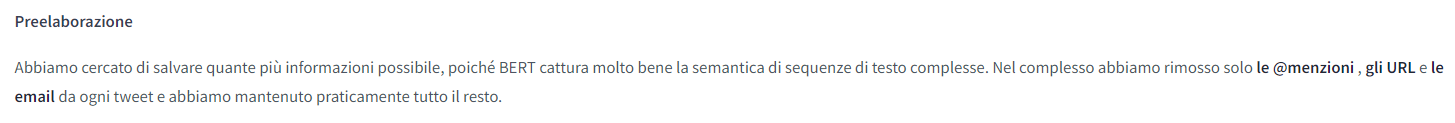

Si procede quindi con un semplice preprocessing:


### Inferenza

In [10]:
import numpy as np
import tensorflow as tf
from tqdm import tqdm

for index, row in tqdm(bert.iterrows()):
  sentence  = row.comment_body

  input_ids = tokenizer.encode(sentence, add_special_tokens=True, truncation=True, max_length=512)

  # Create tensor, use .cuda() to transfer the tensor to GPU
  tensor = torch.tensor(input_ids).long()
  # Fake batch dimension
  tensor = tensor.unsqueeze(0)

  # Call the model and get the logits
  logits = model(tensor)
  # Remove the fake batch dimension
  logits = logits.logits.squeeze(0)

  # The model was trained with a Log Likelyhood + Softmax combined loss, hence to extract probabilities we need a softmax on top of the logits tensor
  proba = nn.functional.softmax(logits, dim=0)

  # Unpack the tensor to obtain negative, neutral and positive probabilities
  negative, neutral, positive = proba

  bert.loc[index,'sentiment_neg'] = proba[0].detach().numpy()
  bert.loc[index,'sentiment_neut'] = proba[1].detach().numpy()
  bert.loc[index,'sentiment_pos'] = proba[2].detach().numpy()


bert['sentiment_pred'] = bert[['sentiment_neg', 'sentiment_pos', 'sentiment_neut']].idxmax(axis=1)
print(bert)

1530it [04:20,  5.88it/s]

     comment_id  post_id  debate_group comment_user_name commented_user_name   
0       ki3k2mh  197vo6o             1          SurprysE   Odd_Sentence_2618  \
1       ki5i0gd  197vo6o             1          SurprysE     the_white_cloud   
2       ki4y2a5  197vo6o             1          SurprysE     the_white_cloud   
3       ki3r883  197vo6o             1   theseawillclaim          zombilives   
4       ki3jhkw  197vo6o             2      Polaroid1793     TURBINEFABRIK74   
...         ...      ...           ...               ...                 ...   
1525    j7gdw50  10v8sey            30           rentrum     Heisenberg_9373   
1526    j7hvzdu  10v8sey            30         Bitmap901     Heisenberg_9373   
1527    j7gtsyc  10v8sey            30         stjimmy96             Ghaladh   
1528    j7if1dk  10v8sey            30       UrektMazino           stjimmy96   
1529    j7giw5g  10v8sey            30       ArthurD3nt_        sunurban_trn   

                                       

In [11]:
bert

,comment_id,post_id,debate_group,comment_user_name,commented_user_name,comment_body,comment_score,sentiment_neg,sentiment_neut,sentiment_pos,sentiment_pred
0,ki3k2mh,197vo6o,1,SurprysE,Odd_Sentence_2618,BOIA SI! Basta guardare da dove sono registrat...,11,0.001337,0.991461,0.007202,sentiment_neut
1,ki5i0gd,197vo6o,1,SurprysE,the_white_cloud,"Non fa una grinza, ma metti in movimento il tu...",1,0.002218,0.289081,0.708701,sentiment_pos
2,ki4y2a5,197vo6o,1,SurprysE,the_white_cloud,Sono bot che fanno un minimo di attività per e...,1,0.002337,0.996980,0.000683,sentiment_neut
3,ki3r883,197vo6o,1,theseawillclaim,zombilives,"Ma immagino, anche il suo brand è sempre in ro...",12,0.049374,0.383917,0.566709,sentiment_pos
4,ki3jhkw,197vo6o,2,Polaroid1793,TURBINEFABRIK74,Non ho mai visto una persona in vita mia camb...,3,0.993816,0.005632,0.000551,sentiment_neg
...,...,...,...,...,...,...,...,...,...,...,...
1525,j7gdw50,10v8sey,30,rentrum,Heisenberg_9373,Heisenberg torna a produrre meth che è meglio,5,0.027095,0.553820,0.419085,sentiment_neut
1526,j7hvzdu,10v8sey,30,Bitmap901,Heisenberg_9373,"Un commento prima dicevi che le ""elite"" voglio...",0,0.002497,0.069480,0.928022,sentiment_pos
1527,j7gtsyc,10v8sey,30,stjimmy96,Ghaladh,Ma il problema di base è che gli allevamenti s...,5,0.861733,0.134103,0.004164,sentiment_neg
1528,j7if1dk,10v8sey,30,UrektMazino,stjimmy96,Esattamente!\r\n\r\nSi parla tanto di proteine...,2,0.301325,0.064371,0.634304,sentiment_pos


In [532]:
bert.sentiment_pred.value_counts()

sentiment_pred
sentiment_neg     267
sentiment_neut    258
sentiment_pos      49
Name: count, dtype: int64

In [533]:
# Vedo quali commenti sono classificati con sentiment positivo
i = 0
for pred in bert['sentiment_pred']:
    if(pred == 'sentiment_pos'):
        print(bert.iloc[i]['comment_body'])
    i += 1

Perché accusare un uomo binaco etero é sicurezza di internet punti!!!!
Chi si fa scappare una occasione del genere.


Pace all'anima di quella ragazza.
Sarà stato già detto, ma onestamente mi fa solo tanto ribrezzo come tutti questi automi, piuttosto che praticarlo nella vita di sempre, solo quando si verificano questi eventi postano a manetta sui vari social, abbandonando il pensiero lo stesso domani (in cui ci sarà altro di cui parlare, un altro like per un'altra battaglia che si combatte solo virtualmente).

Non voglio fare la morale a nessuno, e non me ne frega nemmeno un accidenti delle persone che parlano a vanvera o si contraddicono su questa vicenda, ma il mio unico appello si rivolge a voi:

Abbiate le vostre cristo di battaglie una volta per tutte, e salde a voi. Combattete tangibilmente per esse...fisicamente e attivandovi in qualche maniera. 

Le belle parole faranno sicuramente piacere a persone che stanno soffrendo terribilmente in questo momento (non immagino e non vogli

In [534]:
bert.to_csv('BERT.csv', index = False)

Salviamo un dataframe che contenga tutte le classificazioni così da poter essere messe a paragone facilmente:

In [535]:
sentiment_df = bert.copy()
sentiment_df.drop(['sentiment_neg', 'sentiment_neut', 'sentiment_pos'], axis=1, inplace=True)
sentiment_df.rename(columns = {'sentiment_pred':'BERT'}, inplace = True)

In [536]:
sentiment_df

,comment_id,comment_body,BERT
0,k9yfohd,Il vero problema è l'immensa orda di giornalis...,sentiment_neg
1,k9xjbzd,"Non è un idiota l'ex ragazzo, è un assassino, ...",sentiment_neg
2,k9zies2,Sono sti ragazzetti sui social che ormai han p...,sentiment_neg
3,k9xb0xr,"Non fatevi influenzare dai post, continuate ad...",sentiment_neg
4,k9xmjhd,ti da fastidio perchè percepisci giustamente c...,sentiment_neg
...,...,...,...
569,k9y62fj,Lol ma guarda che non ho detto di essere io la...,sentiment_neg
570,ka031nw,"Io non ho letto istigazioni all’odio, ho letto...",sentiment_neg
571,k9zqygu,"Ma che insulto, sempre a fare le vittime state...",sentiment_neg
572,k9yh8wj,Non c e nulla da comprendere sei te che non ha...,sentiment_neg


## FEEL-IT: Emotion and Sentiment Classification for the Italian Language

https://huggingface.co/MilaNLProc/feel-it-italian-sentiment

Utilizzo un altro classificatore di sentiment, dotato di un corpus di riferimento di post Twitter italiani annotati con quattro emozioni fondamentali: rabbia, paura, gioia, tristezza. Comprimendoli, possiamo anche fare l’analisi del sentiment. 

### Preprocessing

Paper: https://aclanthology.org/2021.wassa-1.8.pdf

Il documento della "2021 WASSA Shared Task on Empathy Detection and Emotion Classification" descrive i passaggi di preprocessamento nella Sezione 2, che includono le seguenti fasi chiave:

1. Pulizia dei dati:

* Il dataset è stato sottoposto a tecniche di preprocessamento standard, come la conversione di tutto il testo in minuscolo per mantenere la coerenza nel dataset.
* La punteggiatura, i caratteri speciali e i numeri sono stati rimossi per ridurre il rumore nei dati.
* Gli URL, le menzioni (ad es., @user) e gli hashtag sono stati rimossi o sostituiti con token generici (ad es., URL, USER, HASHTAG) per anonimizzare e standardizzare questi elementi.

2. Tokenizzazione:

* È stata eseguita la tokenizzazione per suddividere il testo in singole parole o token.
* Il processo di tokenizzazione è stato adattato per gestire le caratteristiche linguistiche specifiche e le peculiarità presenti nel dataset.

3. Normalizzazione:

* I passaggi di normalizzazione includevano la conversione delle parole allungate alla loro forma base (ad es., "soooo" in "so").
* Lo slang e le abbreviazioni comuni sono stati espansi alle loro forme complete per garantire l'uniformità nel dataset.

4. Lemmatizzazione/Stemming:

* È stata applicata la lemmatizzazione o stemming per ridurre le parole alle loro forme radice, contribuendo a ridurre la dimensionalità del dataset e migliorare le prestazioni del modello.

5. Rimozione delle stop words:

* Le parole comuni (ad es., "e", "il", "è") sono state rimosse dal dataset per concentrarsi sulle parole più informative.

### Sentiment

In [537]:
from feel_it import SentimentClassifier
sentiment_classifier = SentimentClassifier()

c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [1]:
from transformers import pipeline

classifier = pipeline("text-classification", model='MilaNLProc/feel-it-italian-sentiment', top_k=2)
prediction = classifier(["Oggi sono proprio contento!"])

c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [540]:
# Aggiungo al mio dataframe la oclonna relativa al sentiment predetto
feel["sentiment_pred"] = {}  
feel["sentiment_pos"] = {}
feel["sentiment_neg"] = {}

In [541]:
# Funzione di tokenizzazione con padding e truncation
def preprocess(text, tokenizer, max_length=512):
    return tokenizer(text, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')

In [542]:
# Crea un nuovo DataFrame
feel = filtered_df.copy()

In [543]:
feel

,comment_id,comment_body
0,k9yfohd,Il vero problema è l'immensa orda di giornalis...
1,k9xjbzd,"Non è un idiota l'ex ragazzo, è un assassino, ..."
2,k9zies2,Sono sti ragazzetti sui social che ormai han p...
3,k9xb0xr,"Non fatevi influenzare dai post, continuate ad..."
4,k9xmjhd,ti da fastidio perchè percepisci giustamente c...
...,...,...
569,k9y62fj,Lol ma guarda che non ho detto di essere io la...
570,ka031nw,"Io non ho letto istigazioni all’odio, ho letto..."
571,k9zqygu,"Ma che insulto, sempre a fare le vittime state..."
572,k9yh8wj,Non c e nulla da comprendere sei te che non ha...


In [102]:
# Funzione per classificare il testo e aggiornare il DataFrame
def classify_and_update(df, tokenizer, model):
    for i, row in df.iterrows():
        text = row['comment_body']  
        
        # Tokenizzo il testo e converto in tensori
        inputs = tokenizer(text, padding='max_length', truncation=True, max_length=512, return_tensors='pt')
        
        # Eseguo la classificazione sul modello
        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits
            probabilities = torch.softmax(logits, dim=1).squeeze()
            score_positive = probabilities[1].item()
            score_negative = probabilities[0].item()
        
        # Assegno i punteggi al DataFrame
        df.at[i, 'sentiment_pos'] = score_positive  
        df.at[i, 'sentiment_neg'] = score_negative  
        
        # Determino l'etichetta di sentiment
        sentiment = 'positive' if score_positive >= score_negative else 'negative'
        df.at[i, 'sentiment_pred'] = sentiment
        
        num_rows = df.shape[0]
        print(f"Processed row {i+1}/{len(df)}")

In [545]:
# Esegui la classificazione e l'aggiornamento del DataFrame
classify_and_update(feel, tokenizer, model)

# Stampa il dataframe per verificare i risultati
print(feel)

Processed row 1/574
Processed row 2/574
Processed row 3/574
Processed row 4/574
Processed row 5/574
Processed row 6/574
Processed row 7/574
Processed row 8/574
Processed row 9/574
Processed row 10/574
Processed row 11/574
Processed row 12/574
Processed row 13/574
Processed row 14/574
Processed row 15/574
Processed row 16/574
Processed row 17/574
Processed row 18/574
Processed row 19/574
Processed row 20/574
Processed row 21/574
Processed row 22/574
Processed row 23/574
Processed row 24/574
Processed row 25/574
Processed row 26/574
Processed row 27/574
Processed row 28/574
Processed row 29/574
Processed row 30/574
Processed row 31/574
Processed row 32/574
Processed row 33/574
Processed row 34/574
Processed row 35/574
Processed row 36/574
Processed row 37/574
Processed row 38/574
Processed row 39/574
Processed row 40/574
Processed row 41/574
Processed row 42/574
Processed row 43/574
Processed row 44/574
Processed row 45/574
Processed row 46/574
Processed row 47/574
Processed row 48/574
P

In [546]:
feel.to_csv('FEEL.csv', index = False)

In [547]:
feel.sentiment_pred.value_counts()

sentiment_pred
positive    303
negative    271
Name: count, dtype: int64

In [578]:
# Salvo nel csv dei risultati comparati la colonna relativa a queste ultime previsioni
sentiment_df['FEEL'] = feel['sentiment_pred']
sentiment_df.to_csv('sentiment_comparison.csv', index = False)

### Emotion

Utilizzo lo stesso modello per provare a predirre le emozioni

In [549]:
from transformers import pipeline
classifier = pipeline("text-classification",model='MilaNLProc/feel-it-italian-emotion',top_k=2)
prediction = classifier("Oggi sono proprio contento!")
print(prediction)

c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[[{'label': 'joy', 'score': 0.9993919134140015}, {'label': 'sadness', 'score': 0.00026005893596448004}]]


In [550]:
from feel_it import EmotionClassifier

In [551]:
emotion_classifier = EmotionClassifier()

In [552]:
emotion_classifier.predict(["sono molto felice di questo risultato", 
                            "ma che cazzo vuoi", 
                            "che brutta cosa...mi stanno scendendo le lacrime...", 
                            "sì ok ma che spavento che mi sono preso"])

['joy', 'anger', 'sadness', 'fear']

In [553]:
def predict_emotion(comment):
    prediction = emotion_classifier.predict([comment])
    return str(prediction)

In [554]:
# Applico la funzione alla colonna 'comment_body' e creare la nuova colonna 'predict'
feel['emotion_predict'] = feel['comment_body'].apply(predict_emotion)

In [555]:
feel

,comment_id,comment_body,sentiment_pos,sentiment_neg,sentiment_pred,emotion_predict
0,k9yfohd,Il vero problema è l'immensa orda di giornalis...,0.012861,0.986503,negative,['anger']
1,k9xjbzd,"Non è un idiota l'ex ragazzo, è un assassino, ...",0.042449,0.956772,negative,['anger']
2,k9zies2,Sono sti ragazzetti sui social che ormai han p...,0.059577,0.938957,negative,['anger']
3,k9xb0xr,"Non fatevi influenzare dai post, continuate ad...",0.106103,0.885158,negative,['anger']
4,k9xmjhd,ti da fastidio perchè percepisci giustamente c...,0.012425,0.987075,negative,['anger']
...,...,...,...,...,...,...
569,k9y62fj,Lol ma guarda che non ho detto di essere io la...,0.055198,0.943484,negative,['anger']
570,ka031nw,"Io non ho letto istigazioni all’odio, ho letto...",0.003110,0.996675,negative,['anger']
571,k9zqygu,"Ma che insulto, sempre a fare le vittime state...",0.018783,0.980039,negative,['anger']
572,k9yh8wj,Non c e nulla da comprendere sei te che non ha...,0.003693,0.996072,negative,['fear']


In [556]:
i = 0
for emotion in feel['emotion_predict']:
    if(emotion == "['anger']"):
        feel['emotion_predict'].iloc[i] = 'anger'
    elif(emotion == "['sadness']"):
        feel['emotion_predict'].iloc[i] = 'sadness'
    elif(emotion == "['joy']"):
        feel['emotion_predict'].iloc[i] = 'joy'
    elif(emotion == "['fear']"):
        feel['emotion_predict'].iloc[i] = 'fear'  
    i += 1

C:\Users\franc\AppData\Local\Temp\ipykernel_16200\2304998433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feel['emotion_predict'].iloc[i] = 'anger'
C:\Users\franc\AppData\Local\Temp\ipykernel_16200\2304998433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feel['emotion_predict'].iloc[i] = 'anger'
C:\Users\franc\AppData\Local\Temp\ipykernel_16200\2304998433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feel['emotion_pr

In [557]:
feel

,comment_id,comment_body,sentiment_pos,sentiment_neg,sentiment_pred,emotion_predict
0,k9yfohd,Il vero problema è l'immensa orda di giornalis...,0.012861,0.986503,negative,anger
1,k9xjbzd,"Non è un idiota l'ex ragazzo, è un assassino, ...",0.042449,0.956772,negative,anger
2,k9zies2,Sono sti ragazzetti sui social che ormai han p...,0.059577,0.938957,negative,anger
3,k9xb0xr,"Non fatevi influenzare dai post, continuate ad...",0.106103,0.885158,negative,anger
4,k9xmjhd,ti da fastidio perchè percepisci giustamente c...,0.012425,0.987075,negative,anger
...,...,...,...,...,...,...
569,k9y62fj,Lol ma guarda che non ho detto di essere io la...,0.055198,0.943484,negative,anger
570,ka031nw,"Io non ho letto istigazioni all’odio, ho letto...",0.003110,0.996675,negative,anger
571,k9zqygu,"Ma che insulto, sempre a fare le vittime state...",0.018783,0.980039,negative,anger
572,k9yh8wj,Non c e nulla da comprendere sei te che non ha...,0.003693,0.996072,negative,fear


In [558]:
feel.to_csv('FEEL.csv', index = False)

In [559]:
feel.emotion_predict.value_counts()

emotion_predict
anger      336
sadness    145
joy         47
fear        46
Name: count, dtype: int64

In [560]:
joy_comments = feel['comment_body'][feel['emotion_predict'] == 'joy']

In [561]:
# Guardo quali commenti sono classificati come gioiosi
joy_comments

49     https://preview.redd.it/zz4hpta6tf1c1.jpeg?wid...
84                                                Upvote
85     Somehow Italian men manage to make it all abou...
91                Not all men, but somehow always a man.
99     https://preview.redd.it/0749d4c2uj1c1.jpeg?wid...
107    Tutti bravi ragazzi oh. Chissà come, però, que...
118    Un classico, poi succede al contrario e si fan...
137    Commento geniale, poche righe che spiegano **p...
140                ![gif](emote|free_emotes_pack|upvote)
154                 \#yesallman  \n\n\nOK DATEMI I BONUS
168    https://preview.redd.it/i1c08a4vtf1c1.jpeg?wid...
177                                      Ottimo commento
183    Minchia, mai vista così ma mi sento di concordare
187      Te sei un uomo bianco etero e fiero di esserlo?
190                                    Idem, hai ragione
215    É stata trovata sana e salva giusto qualche or...
223                                                Uman*
242                  Stampo e i

In [562]:
joy_comments.iloc[5]

'Tutti bravi ragazzi oh. Chissà come, però, quelle che ci rimettono la pelle sono sempre le donne. Mhhhhh'

## MULTILINGUAL: bert-base-multilingual-uncased-sentiment 

https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment 

Si tratta di un modello bert-base-multilingue-uncased ottimizzato per l'analisi del sentiment sulle recensioni dei prodotti in sei lingue: inglese, olandese, tedesco, francese, spagnolo e italiano. Prevede il sentiment della recensione sotto forma di numero di stelle (tra 1 e 5).

In [563]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment").to("cuda")

c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [564]:
multilingual = filtered_df.copy()

In [565]:
multilingual

,comment_id,comment_body
0,k9yfohd,Il vero problema è l'immensa orda di giornalis...
1,k9xjbzd,"Non è un idiota l'ex ragazzo, è un assassino, ..."
2,k9zies2,Sono sti ragazzetti sui social che ormai han p...
3,k9xb0xr,"Non fatevi influenzare dai post, continuate ad..."
4,k9xmjhd,ti da fastidio perchè percepisci giustamente c...
...,...,...
569,k9y62fj,Lol ma guarda che non ho detto di essere io la...
570,ka031nw,"Io non ho letto istigazioni all’odio, ho letto..."
571,k9zqygu,"Ma che insulto, sempre a fare le vittime state..."
572,k9yh8wj,Non c e nulla da comprendere sei te che non ha...


In [566]:
import numpy as np
import tensorflow as tf
from tqdm import tqdm

for index, row in tqdm(multilingual.iterrows()):
  sentence  = row.comment_body

  input_ids = tokenizer.encode(sentence, add_special_tokens=True, truncation=True, max_length=512)

  # Create tensor, use .cuda() to transfer the tensor to GPU
  tensor = torch.tensor(input_ids).long()
  # Fake batch dimension
  tensor = tensor.unsqueeze(0).to("cuda")

  # Call the model and get the logits
  logits = model(tensor)
  # Remove the fake batch dimension
  logits = logits.logits.squeeze(0)

  # The model was trained with a Log Likelyhood + Softmax combined loss, hence to extract probabilities we need a softmax on top of the logits tensor
  proba = nn.functional.softmax(logits, dim=0)

  # Unpack the tensor to obtain negative, neutral and positive probabilities
  #negative, neutral, positive = proba
  proba = proba.to("cpu")
  multilingual.loc[index,'1'] = proba[0].detach().numpy()
  multilingual.loc[index,'2'] = proba[1].detach().numpy()
  multilingual.loc[index,'3'] = proba[2].detach().numpy()
  multilingual.loc[index,'4'] = proba[3].detach().numpy()
  multilingual.loc[index,'5'] = proba[4].detach().numpy()


multilingual['sentiment_pred'] = multilingual[['1', '2', '3', '4', '5']].idxmax(axis=1)
print(multilingual)

0it [00:00, ?it/s]

574it [00:30, 18.69it/s]

    comment_id                                       comment_body         1   
0      k9yfohd  Il vero problema è l'immensa orda di giornalis...  0.424145  \
1      k9xjbzd  Non è un idiota l'ex ragazzo, è un assassino, ...  0.497877   
2      k9zies2  Sono sti ragazzetti sui social che ormai han p...  0.221347   
3      k9xb0xr  Non fatevi influenzare dai post, continuate ad...  0.195217   
4      k9xmjhd  ti da fastidio perchè percepisci giustamente c...  0.372439   
..         ...                                                ...       ...   
569    k9y62fj  Lol ma guarda che non ho detto di essere io la...  0.343473   
570    ka031nw  Io non ho letto istigazioni all’odio, ho letto...  0.461630   
571    k9zqygu  Ma che insulto, sempre a fare le vittime state...  0.383687   
572    k9yh8wj  Non c e nulla da comprendere sei te che non ha...  0.424241   
573    ka2lsst  Essere bravi in cucina significa sapersi prend...  0.201511   

            2         3         4         5 sentime

In [567]:
multilingual

,comment_id,comment_body,1,2,3,4,5,sentiment_pred
0,k9yfohd,Il vero problema è l'immensa orda di giornalis...,0.424145,0.270420,0.106248,0.092741,0.106447,1
1,k9xjbzd,"Non è un idiota l'ex ragazzo, è un assassino, ...",0.497877,0.296993,0.143791,0.034117,0.027221,1
2,k9zies2,Sono sti ragazzetti sui social che ormai han p...,0.221347,0.179996,0.127700,0.152727,0.318230,5
3,k9xb0xr,"Non fatevi influenzare dai post, continuate ad...",0.195217,0.285951,0.245087,0.143477,0.130267,2
4,k9xmjhd,ti da fastidio perchè percepisci giustamente c...,0.372439,0.392177,0.101903,0.063969,0.069512,2
...,...,...,...,...,...,...,...,...
569,k9y62fj,Lol ma guarda che non ho detto di essere io la...,0.343473,0.342357,0.237828,0.053808,0.022534,1
570,ka031nw,"Io non ho letto istigazioni all’odio, ho letto...",0.461630,0.355217,0.091959,0.041246,0.049948,1
571,k9zqygu,"Ma che insulto, sempre a fare le vittime state...",0.383687,0.364071,0.182905,0.044317,0.025020,1
572,k9yh8wj,Non c e nulla da comprendere sei te che non ha...,0.424241,0.394166,0.113446,0.044422,0.023725,1


In [572]:
# Tentare di convertire i valori della colonna 'sentiment_pred' in numerici, ignorando gli errori
multilingual['sentiment_pred_numeric'] = pd.to_numeric(multilingual['sentiment_pred'], errors='coerce')

# Applicare le trasformazioni solo ai valori numerici
multilingual.loc[multilingual['sentiment_pred_numeric'] >= 4, 'sentiment_pred'] = 'sentiment_pos'
multilingual.loc[multilingual['sentiment_pred_numeric'] <= 2, 'sentiment_pred'] = 'sentiment_neg'
multilingual.loc[multilingual['sentiment_pred_numeric'] == 3, 'sentiment_pred'] = 'sentiment_neut'

# Rimuovere la colonna temporanea utilizzata per la conversione
multilingual.drop(columns=['sentiment_pred_numeric'], inplace=True)

In [574]:
multilingual

,comment_id,comment_body,1,2,3,4,5,sentiment_pred
0,k9yfohd,Il vero problema è l'immensa orda di giornalis...,0.424145,0.270420,0.106248,0.092741,0.106447,sentiment_neg
1,k9xjbzd,"Non è un idiota l'ex ragazzo, è un assassino, ...",0.497877,0.296993,0.143791,0.034117,0.027221,sentiment_neg
2,k9zies2,Sono sti ragazzetti sui social che ormai han p...,0.221347,0.179996,0.127700,0.152727,0.318230,sentiment_pos
3,k9xb0xr,"Non fatevi influenzare dai post, continuate ad...",0.195217,0.285951,0.245087,0.143477,0.130267,sentiment_neg
4,k9xmjhd,ti da fastidio perchè percepisci giustamente c...,0.372439,0.392177,0.101903,0.063969,0.069512,sentiment_neg
...,...,...,...,...,...,...,...,...
569,k9y62fj,Lol ma guarda che non ho detto di essere io la...,0.343473,0.342357,0.237828,0.053808,0.022534,sentiment_neg
570,ka031nw,"Io non ho letto istigazioni all’odio, ho letto...",0.461630,0.355217,0.091959,0.041246,0.049948,sentiment_neg
571,k9zqygu,"Ma che insulto, sempre a fare le vittime state...",0.383687,0.364071,0.182905,0.044317,0.025020,sentiment_neg
572,k9yh8wj,Non c e nulla da comprendere sei te che non ha...,0.424241,0.394166,0.113446,0.044422,0.023725,sentiment_neg


In [575]:
multilingual.to_csv('MULTILINGUAL.csv', index = False)

In [580]:
sentiment_df['MULTILINGUAL'] = multilingual['sentiment_pred']

In [581]:
sentiment_df

,comment_id,comment_body,BERT,FEEL,MULTILINGUAL
0,k9yfohd,Il vero problema è l'immensa orda di giornalis...,sentiment_neg,negative,sentiment_neg
1,k9xjbzd,"Non è un idiota l'ex ragazzo, è un assassino, ...",sentiment_neg,negative,sentiment_neg
2,k9zies2,Sono sti ragazzetti sui social che ormai han p...,sentiment_neg,negative,sentiment_pos
3,k9xb0xr,"Non fatevi influenzare dai post, continuate ad...",sentiment_neg,negative,sentiment_neg
4,k9xmjhd,ti da fastidio perchè percepisci giustamente c...,sentiment_neg,negative,sentiment_neg
...,...,...,...,...,...
569,k9y62fj,Lol ma guarda che non ho detto di essere io la...,sentiment_neg,negative,sentiment_neg
570,ka031nw,"Io non ho letto istigazioni all’odio, ho letto...",sentiment_neg,negative,sentiment_neg
571,k9zqygu,"Ma che insulto, sempre a fare le vittime state...",sentiment_neg,negative,sentiment_neg
572,k9yh8wj,Non c e nulla da comprendere sei te che non ha...,sentiment_neg,negative,sentiment_neg


In [585]:
# per uniformare il tutto, sostituisco i valori delle colonne con quelli corretti
sentiment_df["BERT"].replace("sentiment_neg", "negative", inplace=True)
sentiment_df["MULTILINGUAL"].replace("sentiment_neg", "negative", inplace=True)
sentiment_df["BERT"].replace("sentiment_neut", "neutral", inplace=True)
sentiment_df["MULTILINGUAL"].replace("sentiment_neut", "neutral", inplace=True)
sentiment_df["BERT"].replace("sentiment_pos", "positive", inplace=True)
sentiment_df["MULTILINGUAL"].replace("sentiment_pos", "positive", inplace=True)

In [586]:
sentiment_df

,comment_id,comment_body,BERT,FEEL,MULTILINGUAL
0,k9yfohd,Il vero problema è l'immensa orda di giornalis...,negative,negative,negative
1,k9xjbzd,"Non è un idiota l'ex ragazzo, è un assassino, ...",negative,negative,negative
2,k9zies2,Sono sti ragazzetti sui social che ormai han p...,negative,negative,positive
3,k9xb0xr,"Non fatevi influenzare dai post, continuate ad...",negative,negative,negative
4,k9xmjhd,ti da fastidio perchè percepisci giustamente c...,negative,negative,negative
...,...,...,...,...,...
569,k9y62fj,Lol ma guarda che non ho detto di essere io la...,negative,negative,negative
570,ka031nw,"Io non ho letto istigazioni all’odio, ho letto...",negative,negative,negative
571,k9zqygu,"Ma che insulto, sempre a fare le vittime state...",negative,negative,negative
572,k9yh8wj,Non c e nulla da comprendere sei te che non ha...,negative,negative,negative


In [587]:
# Aggiungo al dataset generale anche la colonna relativa alle emozioni
sentiment_df["emotion"] = feel['emotion_predict']

In [588]:
sentiment_df

,comment_id,comment_body,BERT,FEEL,MULTILINGUAL,emotion
0,k9yfohd,Il vero problema è l'immensa orda di giornalis...,negative,negative,negative,anger
1,k9xjbzd,"Non è un idiota l'ex ragazzo, è un assassino, ...",negative,negative,negative,anger
2,k9zies2,Sono sti ragazzetti sui social che ormai han p...,negative,negative,positive,anger
3,k9xb0xr,"Non fatevi influenzare dai post, continuate ad...",negative,negative,negative,anger
4,k9xmjhd,ti da fastidio perchè percepisci giustamente c...,negative,negative,negative,anger
...,...,...,...,...,...,...
569,k9y62fj,Lol ma guarda che non ho detto di essere io la...,negative,negative,negative,anger
570,ka031nw,"Io non ho letto istigazioni all’odio, ho letto...",negative,negative,negative,anger
571,k9zqygu,"Ma che insulto, sempre a fare le vittime state...",negative,negative,negative,anger
572,k9yh8wj,Non c e nulla da comprendere sei te che non ha...,negative,negative,negative,fear


In [589]:
sentiment_df.to_csv('sentiment_comparison.csv', index = False)

## Etichettatura

Si procede etichettando il dataset risultante per maggioranza: si comparano i risultati dei tre modelli e, il sentimento che prevale, sarà quello associato al dato commento. Quando ho tre sentimenti differenti, imposto "neutral".

In [8]:
import pandas as pd
sentiment_df = pd.read_csv('../results/sentiment_comparison.csv')

In [10]:
# Funzione per calcolare il voto di maggioranza
def majority_vote(row):
    predictions = [row['BERT'], row['FEEL'], row['MULTILINGUAL']]
    if(row['BERT'] != row['FEEL'] != row['MULTILINGUAL']):  
            return 'neutral'
    else:
         return max(set(predictions), key=predictions.count)

In [13]:
# Applico la funzione di maggioranza per ottenere il sentiment definitivo
sentiment_df['final_sentiment'] = sentiment_df.apply(majority_vote, axis=1)

# Salvo il dataset etichettato
sentiment_df.to_csv("../results/sentiment_comparison.csv", index=False)

- Preprocessing per capire se i modelli funzionano meglio.
- Unire i commenti in uno e anche no. Vedere se cambia qualcosa
- Far runnare i modelli su tutti i dataset dei dibattiti nei post